### Importing Libraries and Loading the Dataset
The necessary libraries are imported, and the dataset is loaded from an Excel file for analysis. The first five records are displayed to provide an initial understanding of the data.


In [2]:
# import necessary modules and dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("HousePricePrediction.xlsx")

# show first 5 records of the dataset
dataset.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


### Dataset Dimensions
This code block retrieves the number of rows and columns in the dataset to understand its scale.

In [3]:
# dimension of dataset
dataset.shape

(2919, 13)

### Checking Data Types
Displays the data types of each column to categorize features as numerical or categorical for further preprocessing.

In [4]:
# returns a series with the data type of each column
dataset.dtypes 

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

### Categorizing Features by Data Type
Classifies columns as categorical, integer, or float types and counts the number of features in each category.


In [33]:
# obtaining columns that are objects

# creates a boolean series where each column is True if its dtype is 'object'
obj = (dataset.dtypes == 'object') 
# keep only true values and retrieves their index (column names) into a list that is printed
object_cols = list(obj[obj].index)  
print("Categorical variables:",len(object_cols))

int = (dataset.dtypes == 'int')
num_cols = list(int[int].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 5
Float variables: 3


### Exploratory Data Analysis: Heatmap
Generates a heatmap to visualize correlations between numerical features, helping to identify relationships and trends in the dataset.


<AxesSubplot:>

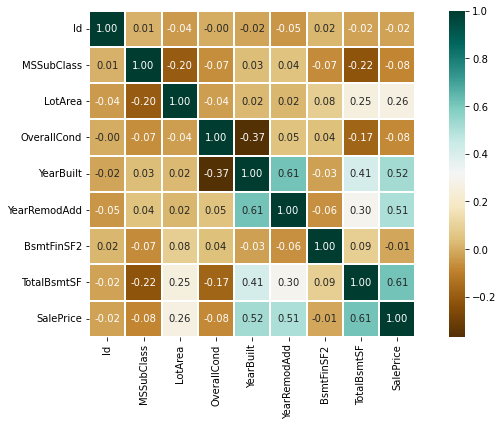

In [6]:
# seaborn is used as it more efficient with inborn heatmap functions
# this inborn function handle many steps automatically 

# select only numerical features for correlation analysis
numerical_dataset = dataset.select_dtypes(include=['number'])

# select_dtypes filter columns based on their types.  
# include=['number'] - only numerical columns are selected

# create figure
plt.figure(figsize=(12, 6))

# uses Seaborn's heatmap function to visualize the correlations between numerical features.

sns.heatmap(numerical_dataset.corr(), # Computes the correlation matrix for all numerical columns in the dataset
            cmap = 'BrBG', # blue and brown shades color map
            fmt = '.2f', linewidths = 2, 
            annot = True, square = True) # Annotates the heatmap cells with the actual correlation values.

### Unique Values in Categorical Features
This block analyzes categorical features by plotting the number of unique values in each.

<AxesSubplot:title={'center':'Number of Unique values of Categorical Features'}>

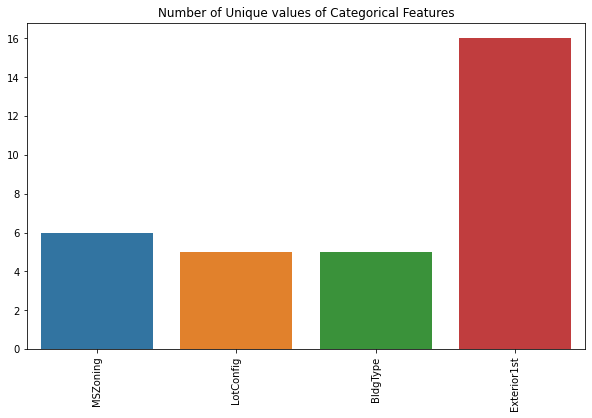

In [10]:
# now we analyze the different categorical features using the barplot.

unique_values = []

# loop through object_cols, access each column, find unique values in each and the size
for col in object_cols:
  unique_values.append(dataset[col].unique().size)

plt.figure(figsize=(10,6))

plt.title('Number of Unique values of Categorical Features')

plt.xticks(rotation=90)

sns.barplot(x=object_cols,y=unique_values)

### Distribution of Categorical Features
Plots the distribution of values in each categorical feature, providing insights into their variability and prevalence.


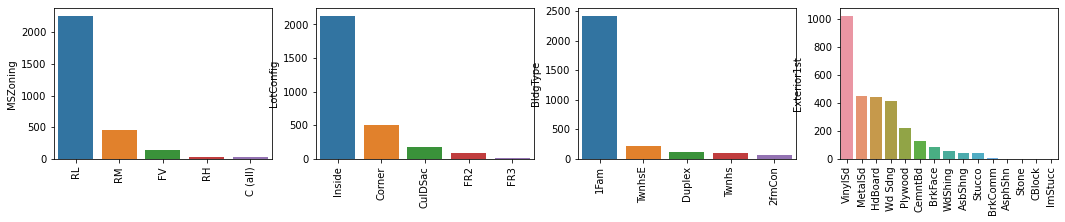

In [11]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1 # specify the position of the subplot within the grid layout

for col in object_cols:
    y = dataset[col].value_counts() # Counts the occurrences of each unique value in the current column. index is unique values and 
    # the values are their counts
    plt.subplot(11, 4, index) # The figure is divided into a grid with 11 rows and 4 columns, "index" is where fig is plotted
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

### Data Cleaning
Drops irrelevant columns, handles missing values, and prepares the dataset for further analysis and machine learning.


In [18]:
dataset = pd.read_excel("HousePricePrediction.xlsx")

# drop irrelevant columns (in this case, the Id column)
dataset.drop(['Id'],axis=1,inplace=True)

# check for missing values and give the total
print(dataset.isnull().sum()) 

# Saleprice has a high number of missing values
# replace the empty values in SalePrice with their mean values
dataset['SalePrice'].fillna(dataset['SalePrice'].mean(), inplace=True)
 
dataset.dropna(inplace=True)

# recheck features with null values
print(dataset.isnull().sum())

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64


### One-Hot Encoding Categorical Features
Encodes categorical variables into a numerical format suitable for machine learning models using `OneHotEncoder`.

In [23]:
# import useful library
from sklearn.preprocessing import OneHotEncoder 

# first we obtain the categorical variables from the cleaned data set

obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:")
print(object_cols)
print('Number of categorical features: ', len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
Number of categorical features:  4


In [24]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# fits the encoder on the categorical columns and transforms these columns into a one-hot encoded format
encoded_array = encoder.fit_transform(dataset[object_cols])

# convert to dataFrame 
encoded_cols = pd.DataFrame(encoded_array)

# ensure the one-hot encoded DataFrame has the same index as the original dataset, maintaining alignment
encoded_cols.index = dataset.index

# assign meaningful column names to the one-hot encoded DataFrame, derived from the original column names and the categories
encoded_cols.columns = encoder.get_feature_names_out()

# remove the original categorical columns listed in object_cols from the dataset
df = dataset.drop(object_cols, axis=1)

# combine the remaining numerical data with the one-hot encoded columns 
# creating a final dataset where all categorical variables have been replaced with their one-hot encoded counterparts
df = pd.concat([df, encoded_cols], axis=1)

df.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Splitting Data for Machine Learning
Splits the dataset into independent variables (`X`) and target variable (`Y`), then divides the data into training and validation sets.

In [25]:
# import useful library - utility function that splits a dataset into training and test sets
from sklearn.model_selection import train_test_split

X = df.drop(['SalePrice'], axis=1) 
Y = df['SalePrice']

# split the data into training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

### Model Performance Comparison

This section trains three different models to predict house prices

- **Linear Regression Model** 
- **Support Vector Machine Regression**
- **Random Forest Regression**

Furthermore, it compares the performance of the trained models using two metrics:

- **Mean Absolute Percentage Error (MAE):** Expresses the average error as a percentage of the actual values.
- **Root Mean Squared Error (RMSE):** Provides a weighted measure of errors.

The results are tabulated to identify which model performs best.

In [45]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
# Support Vector Machine Regression
from sklearn import svm 
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
# MAPE, RMSE
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train, Y_train)

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)

# Compare model perfomances
# Calculate MAPE and RMSE for each model
models = {
    "Linear Regression": model_lin_reg,
    "Support Vector Machine": model_SVR,
    "Random Forest": model_RFR}

performance = []

for name, model in models.items():
    predictions = model.predict(X_valid)
    mape = mean_absolute_percentage_error(Y_valid, predictions)
    rmse = mean_squared_error(Y_valid, predictions, squared=False)
    performance.append({"Model": name, "MAPE": mape, "RMSE": rmse})

# Convert performance metrics into a DataFrame for better visualization
performance_df = pd.DataFrame(performance)

# Display model performance comparison
performance_df.sort_values(by="MAPE", ascending=True)

,Model,MAPE,RMSE
1,Support Vector Machine,0.187051,52000.902138
0,Linear Regression,0.187417,41138.555717
2,Random Forest,0.193453,44373.976993


### Conclusion

Based on the model performance metrics:

1. **Key Findings:**
   - The Linear Regression model has low MAE and RMSE and can be taken to be the most effective in predicting house prices.

2. **Improvements:**
   - Future iterations can explore hyperparameter tuning, ensemble techniques, or additional feature engineering to further improve model performance.

3. **Business Impact:**
   - This analysis provides a robust methodology for house price prediction, enabling stakeholders to make informed decisions in real estate valuation and investment planning.
